In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
plotly.tools.set_credentials_file(username='tannim', api_key='0WYwope4VSW5xY1ZTben')

### Plot of models with embeddings

In [10]:
embedding = pd.read_csv('embeddings_total.csv')

In [11]:
result_sort = embedding.sort_values(['val_loss'])
result_sort.head()

,dl,fl1,fl2,fl3,kl,layer,optimizer,train_acc,train_loss,val_acc,val_loss,trainable_params
1989,16,128,16,32,5,1,Adam,0.921803,0.181132,0.901725,0.230709,66226
2026,64,128,16,64,5,2,Adam,0.917302,0.191708,0.902476,0.231941,75602
1976,32,128,16,16,5,3,Nadam,0.918865,0.190353,0.900975,0.233088,76290
1813,64,64,64,32,5,2,Nadam,0.915677,0.195752,0.895224,0.233315,56898
1987,128,128,16,16,5,2,Nadam,0.918740,0.188945,0.899725,0.234236,76818


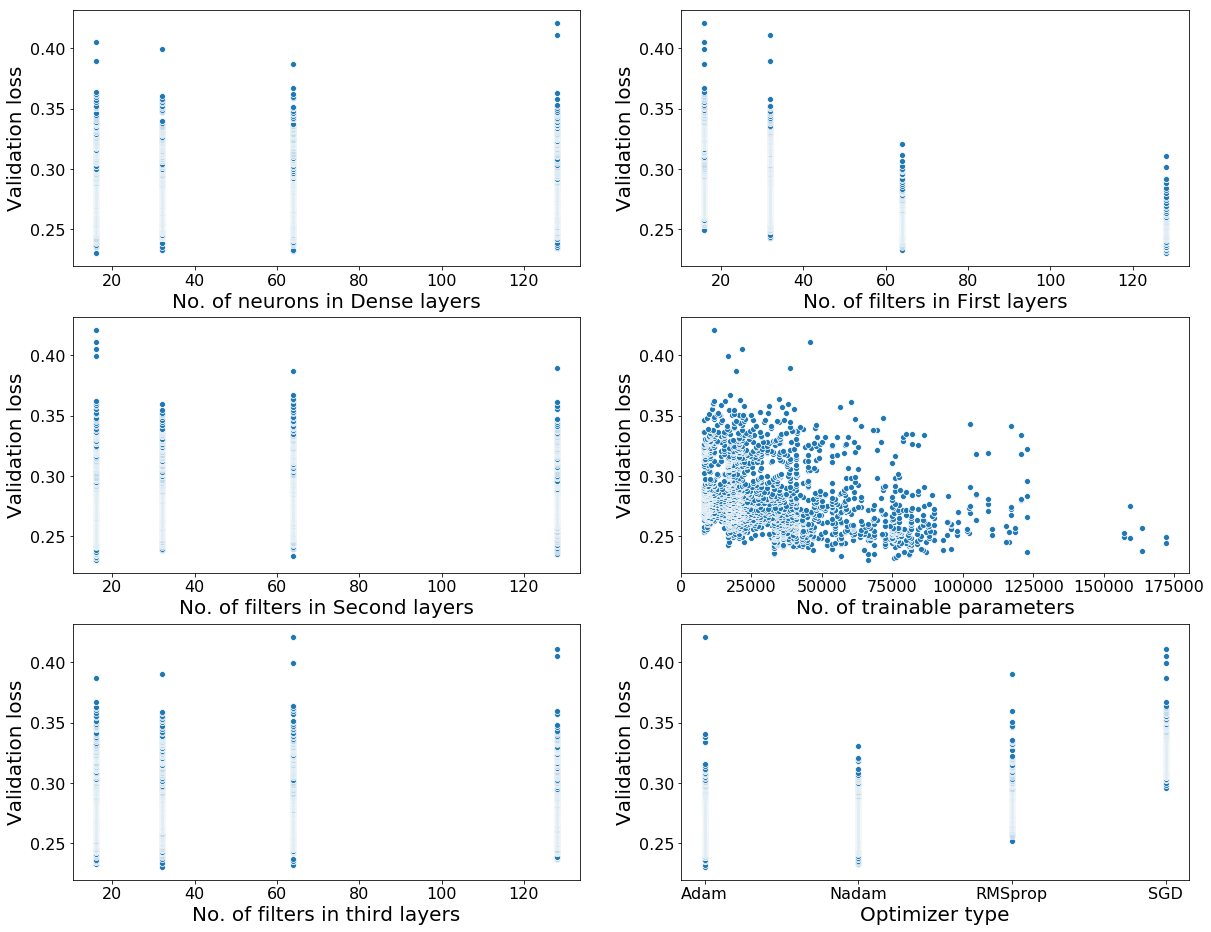

In [12]:
fig = plt.figure(figsize=(20,16))
fig.add_subplot(321)   #top left
ax1 = sns.scatterplot(x=result_sort['dl'], y=result_sort['val_loss'], data=result_sort)
ax1.set_xlabel('No. of neurons in Dense layers', fontsize = 20)
ax1.set_ylabel('Validation loss', fontsize = 20)
ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
fig.add_subplot(322)   #top right
ax2 = sns.scatterplot(x=result_sort['fl1'], y=result_sort['val_loss'], data=result_sort)
ax2.set_xlabel('No. of filters in First layers', fontsize = 20)
ax2.set_ylabel('Validation loss', fontsize = 20)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)
fig.add_subplot(323)   #bottom left
ax3 = sns.scatterplot(x=result_sort['fl2'], y=result_sort['val_loss'], data=result_sort)
ax3.set_xlabel('No. of filters in Second layers', fontsize = 20)
ax3.set_ylabel('Validation loss', fontsize = 20)
ax3.tick_params(axis="x", labelsize=16)
ax3.tick_params(axis="y", labelsize=16)
fig.add_subplot(324)   #bottom right 
ax4 = sns.scatterplot(x=result_sort['trainable_params'], y=result_sort['val_loss'], data=result_sort)
ax4.set_xlabel('No. of trainable parameters', fontsize = 20)
ax4.set_ylabel('Validation loss', fontsize = 20)
ax4.tick_params(axis="x", labelsize=16)
ax4.tick_params(axis="y", labelsize=16)
fig.add_subplot(325)   #bottom right 
ax5 = sns.scatterplot(x=result_sort['fl3'], y=result_sort['val_loss'], data=result_sort)
ax5.set_xlabel('No. of filters in third layers', fontsize = 20)
ax5.set_ylabel('Validation loss', fontsize = 20)
ax5.tick_params(axis="x", labelsize=16)
ax5.tick_params(axis="y", labelsize=16)
fig.add_subplot(326)   #bottom right 
ax6 = sns.scatterplot(x=result_sort['optimizer'], y=result_sort['val_loss'], data=result_sort)
ax6.set_xlabel('Optimizer type', fontsize = 20)
ax6.set_ylabel('Validation loss', fontsize = 20)
ax6.tick_params(axis="x", labelsize=16)
ax6.tick_params(axis="y", labelsize=16)
plt.savefig('CNN.png')

In [13]:
fig.savefig('scatteroutput.png', dpi=300)

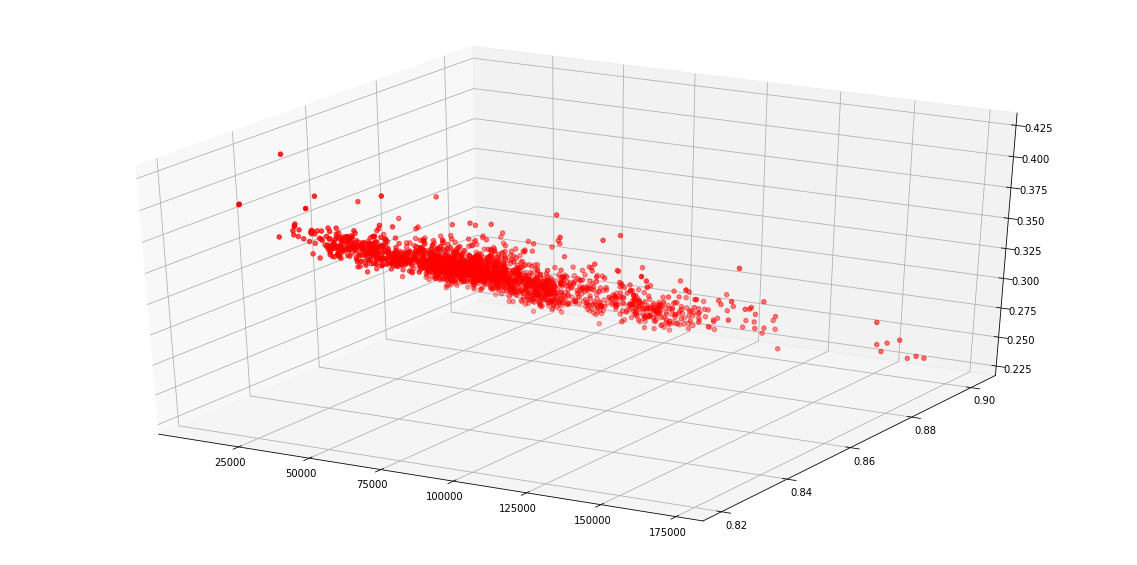

In [14]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result_sort['trainable_params'], result_sort['val_acc'], result_sort['val_loss'], c='r', marker='o')

In [28]:
# Linear scale

trace = go.Scatter3d(
    x=result_sort['trainable_params'],
    y=result_sort['dl'],
    z=result_sort['val_loss'],
    mode='markers', 
    marker=dict(
        size=result_sort.layer*2,
        color= result_sort.layer,
        opacity=0.99,
        colorscale='Viridis',
        colorbar=dict(lenmode='fraction', len=0.5, thickness=20, x=0.75, y=0.65, title = 'layer no.s', dtick=1),
        line=dict(color='rgb(140, 140, 170)')
    ),
    #text=df_gridsearch.Text,
    hoverinfo='text'
)

data = [trace]
layout = go.Layout(
    #title='Hyperparameters from CNN model',
    autosize=False,
    margin=dict(
        l=10,
        r=10,
        b=30,
        t=30
    ),

    height=800,
    width=1060,
    yaxis=dict(automargin=True),
    scene = dict(
        xaxis = dict(
            title='Trainable parameters',
            nticks=10
        ),
        yaxis = dict(
            title='Dense layers',
        ),
        zaxis = dict(
            title='Validation loss',

        ),
    ),
 
)   
camera = dict(up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=-0.4),
    eye=dict(x=2, y=-2.0, z=0.75))
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(scene=dict(camera=camera))
#0WYwope4VSW5xY1ZTben
#plotly.offline.plot(fig, filename='CNN')
url = py.plot(fig, validate=False, filename='filled-3d-lines')

In [3]:
embeddings_LSTM = pd.read_csv('embeddings_LSTM_model.csv')
result_sort1 = embeddings_LSTM.sort_values(['val_loss'])
result_sort1.head()

,dl,fl1,fl2,fl3,kl,layer,optimizer,train_acc,train_loss,val_acc,val_loss,trainable_params
47,64,128,0,0,0,1,Nadam,0.931366,0.164316,0.928982,0.177332,251074
27,64,32,0,0,0,1,Nadam,0.928179,0.180042,0.924231,0.182697,38338
45,32,128,0,0,0,1,Nadam,0.926553,0.180566,0.922731,0.187457,242786
39,64,64,0,0,0,1,Nadam,0.933054,0.163492,0.926232,0.188538,92866
31,128,32,0,0,0,1,Nadam,0.925866,0.178017,0.926732,0.188866,42626


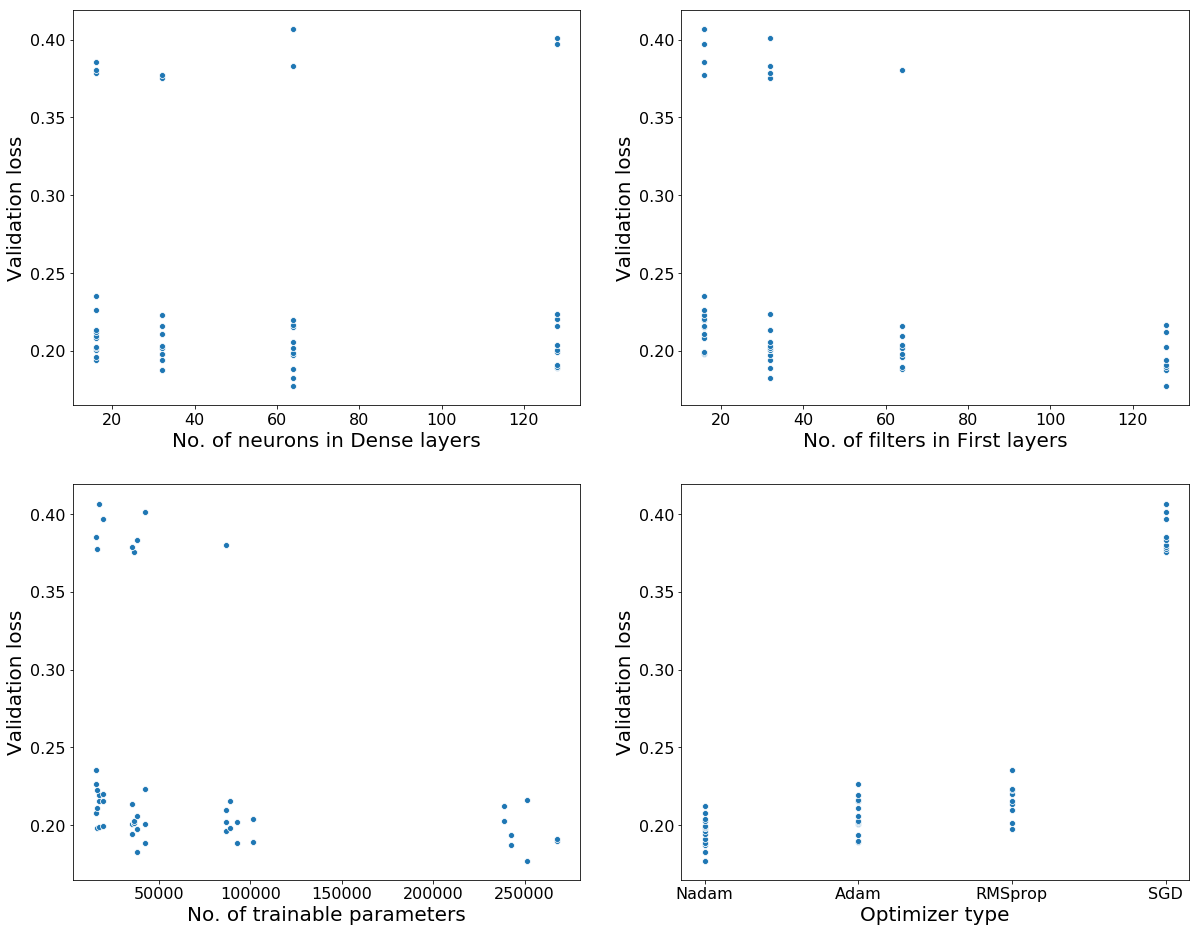

In [5]:
fig = plt.figure(figsize=(20,16))
fig.add_subplot(221)   #top left
ax1 = sns.scatterplot(x=result_sort1['dl'], y=result_sort1['val_loss'], data=result_sort1)
ax1.set_xlabel('No. of neurons in Dense layers', fontsize = 20)
ax1.set_ylabel('Validation loss', fontsize = 20)
ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
fig.add_subplot(222)   #top right
ax2 = sns.scatterplot(x=result_sort1['fl1'], y=result_sort1['val_loss'], data=result_sort1)
ax2.set_xlabel('No. of filters in First layers', fontsize = 20)
ax2.set_ylabel('Validation loss', fontsize = 20)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)
fig.add_subplot(223)   #bottom left
ax3 = sns.scatterplot(x=result_sort1[' trainable_params'], y=result_sort1['val_loss'], data=result_sort1)
ax3.set_xlabel('No. of trainable parameters', fontsize = 20)
ax3.set_ylabel('Validation loss', fontsize = 20)
ax3.tick_params(axis="x", labelsize=16)
ax3.tick_params(axis="y", labelsize=16)
fig.add_subplot(224)   #bottom right 
ax4 = sns.scatterplot(x=result_sort1['optimizer'], y=result_sort1['val_loss'], data=result_sort1)
ax4.set_xlabel('Optimizer type', fontsize = 20)
ax4.set_ylabel('Validation loss', fontsize = 20)
ax4.tick_params(axis="x", labelsize=16)
ax4.tick_params(axis="y", labelsize=16)
plt.savefig('LSTM.png')

In [30]:
# Linear scale

trace = go.Scatter3d(
    x=result_sort1[' trainable_params'],
    y=result_sort1['dl'],
    z=result_sort1['val_loss'],
    mode='markers', 
    marker=dict(
        size=result_sort1.fl1*0.1,
        color= result_sort1.fl1,
        opacity=0.99,
        colorscale='Viridis',
        colorbar=dict(lenmode='fraction', len=0.5, thickness=20, x=0.9, y=0.65, title = 'Filter no.s', dtick=20),
        line=dict(color='rgb(140, 140, 170)')
    ),
    #text=df_gridsearch.Text,
    hoverinfo='text'
)

data = [trace]
layout = go.Layout(
    autosize=False,
    #title='Hyperparameters from LSTM model',
    margin=dict(
        l=30,
        r=30,
        b=30,
        t=30,
        pad =4
    ),
    height=800,
    width=1000,
    scene = dict(
        xaxis = dict(
            title='Trainable parameters',
            nticks=10
        ),
        yaxis = dict(
            title='Dense layers',
        ),
        zaxis = dict(
            title='Validation loss',

        ),
    ),
 
)
camera = dict(up=dict(x=0, y=0, z=1),
    center=dict(x=0, y=0, z=-0.4),
    eye=dict(x=2, y=-2.0, z=0.75))
fig = go.Figure(data=data, layout=layout)
fig['layout'].update(scene=dict(camera=camera))
#plot(fig, filename='LSTM')
url = py.plot(fig, validate=False, filename='LSTM_model')